In [4]:
from sklearn import datasets
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target

In [11]:
#교차 검증
def cross_validation(classifier, features, labels) :
    cv_scores=[]
    for i in range(10):
        scores = cross_val_score(classifier, features, labels, 
                                cv=10, scoring='accuracy')
        cv_scores.append(scores.mean())
    return cv_scores

In [12]:
#의사결정 트리의 검증 정확도 저장
dt_cv_scores = cross_validation(tree.DecisionTreeClassifier(), 
                                features, labels)

In [15]:
#랜덤 포레스트의 검증 정확도 저장
rf_cv_scores = cross_validation(RandomForestClassifier(),
                               features, labels)

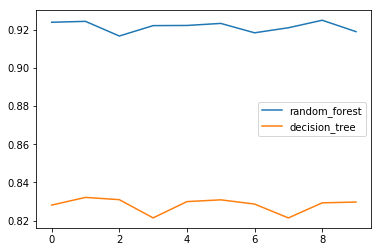

In [16]:
#랜덤포레스트와 의사결정 트리의 정확도 시각화
cv_list = [
    ['random_forest', rf_cv_scores],
    ['decision_tree', dt_cv_scores]
]

df = pd.DataFrame.from_items(cv_list)
df.plot()

In [17]:
np.mean(dt_cv_scores)

0.8282347731829193

In [18]:
np.mean(rf_cv_scores)

0.9215358204468045